# sentinelsat

In [7]:
# see https://sentinelsat.readthedocs.io/en/stable/index.html
# and the Sentinel user guide at https://sentinels.copernicus.eu/web/sentinel/user-guides

#!pip install --user sentinelsat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 126.1 MB/s eta 0:00:0000:0100:01
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
# connect to the OData API
#
# save credentials for scihub.copernicus.eu in $HOME/.netrc like this:
#
# machine scihub.copernicus.eu
#   login <your username>
#   password <your password>
# machine colhub.met.no
#   login <your username>
#   password <your password>
#
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt, make_path_filter

local_api = SentinelAPI(None, None, "https://colhub.met.no")
api = SentinelAPI(None, None, "https://scihub.copernicus.eu/dhus")

data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/"

In [2]:
# get full metadata for a specific product
api.get_product_odata('04548172-c64a-418f-8e83-7a4d148adf1e', full=True)

{'id': '04548172-c64a-418f-8e83-7a4d148adf1e',
 'title': 'S1A_IW_SLC__1SDV_20170425T155612_20170425T155639_016302_01AF91_46FF',
 'size': 4633501134,
 'md5': 'e5855d1c974171d33ee4bc08b9d221ae',
 'date': datetime.datetime(2017, 4, 25, 15, 56, 12, 814000),
 'footprint': 'POLYGON((34.322010 0.401648,36.540989 0.876987,36.884121 -0.747357,34.664474 -1.227940,34.322010 0.401648))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('04548172-c64a-418f-8e83-7a4d148adf1e')/$value",
 'Online': False,
 'Creation Date': datetime.datetime(2017, 4, 25, 19, 22, 0, 383000),
 'Ingestion Date': datetime.datetime(2017, 4, 25, 19, 23, 45, 956000),
 'Acquisition Type': 'NOMINAL',
 'Carrier rocket': 'Soyuz',
 'Cycle number': 107,
 'Date': datetime.datetime(2017, 4, 25, 15, 56, 12, 814000),
 'Filename': 'S1A_IW_SLC__1SDV_20170425T155612_20170425T155639_016302_01AF91_46FF.SAFE',
 'Footprint': '<gml:Polygon srsName="http://www.opengis.net/gml/srs/epsg.xml#4326" xmlns:gml="http://www.opengis.net/gml"

In [6]:
# Spatial locations
locations = [[4.4, 60.3],
             [3.4, 60.3],
             [3.4, 65.7]]

# Time interval
start_time = "2022-09-25T00:00:00.000Z"
end_time = "2022-09-26T23:59:59.000Z"


In [7]:
footprint_json = {
  "type": "Feature",
  "geometry": {
    "type": "MultiPoint",
    "coordinates": locations
  }
}
print(footprint_json)

{'type': 'Feature', 'geometry': {'type': 'MultiPoint', 'coordinates': [[4.4, 60.3], [3.4, 60.3], [3.4, 65.7]]}}


In [8]:
# search by polygon, time, and SciHub query keywords
footprint = geojson_to_wkt(footprint_json)
products = api.query(footprint,
                     date=(start_time, end_time),
                     limit=1,
                     platformname="Sentinel-1")#,
                     #producttype="GRD",
                     #cloudcoverpercentage=(0, 30))

# download all online results from the search
for product_id in list(products.keys()):
    if api.is_online(product_id):
        print("Product {} is online. Will download.".format(product_id))
    else:
        print("Product {} is offline. Will NOT download.".format(product_id))
        del products[product_id]
        #print(("Product {} is offline. Retrieval is triggered.".format(product_id))
        #api.trigger_offline_retrieval(product_id)



INFO:sentinelsat.SentinelAPI:Found 8 products


Product 8ac69d93-ae92-4e8a-ae2e-0f3fd39dfdc9 is online. Will download.


In [9]:
#path_filter = make_path_filter("*s1?-*-grd-vv-*.tiff")
api.download_all(products, directory_path=data_dir)#, nodefilter=path_filter)

# convert to Pandas DataFrame
products_df = api.to_dataframe(products)

# GeoJSON FeatureCollection containing footprints and metadata of the scenes
products_geojson = api.to_geojson(products)

# GeoPandas GeoDataFrame with the metadata of the scenes and the footprints as geometries
products_gdf = api.to_geodataframe(products)

# Get basic information about the product: its title, file size, MD5 sum, date, footprint and
# its download url
#api.get_product_odata(<product_id>)

# Get the product's full metadata available on the server
#api.get_product_odata(<product_id>, full=True)

In [10]:
products_gdf

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,missiondatatakeid,...,producttype,platformname,platformidentifier,instrumentname,instrumentshortname,productclass,polarisationmode,acquisitiontype,uuid,geometry
8ac69d93-ae92-4e8a-ae2e-0f3fd39dfdc9,S1A_IW_SLC__1SDV_20220925T171245_20220925T1713...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-09-25T17:12:45.475Z, Instrument: SA...",false,2022-09-25 17:12:45.475,2022-09-25 17:13:12.444,2022-09-25 18:20:17.266,353761,...,SLC,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,8ac69d93-ae92-4e8a-ae2e-0f3fd39dfdc9,"MULTIPOLYGON (((2.31903 64.73522, 7.76120 65.2..."


/modules/rhel8/conda/install/envs/production-10-2022/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/modules/rhel8/conda/install/envs/production-10-2022/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


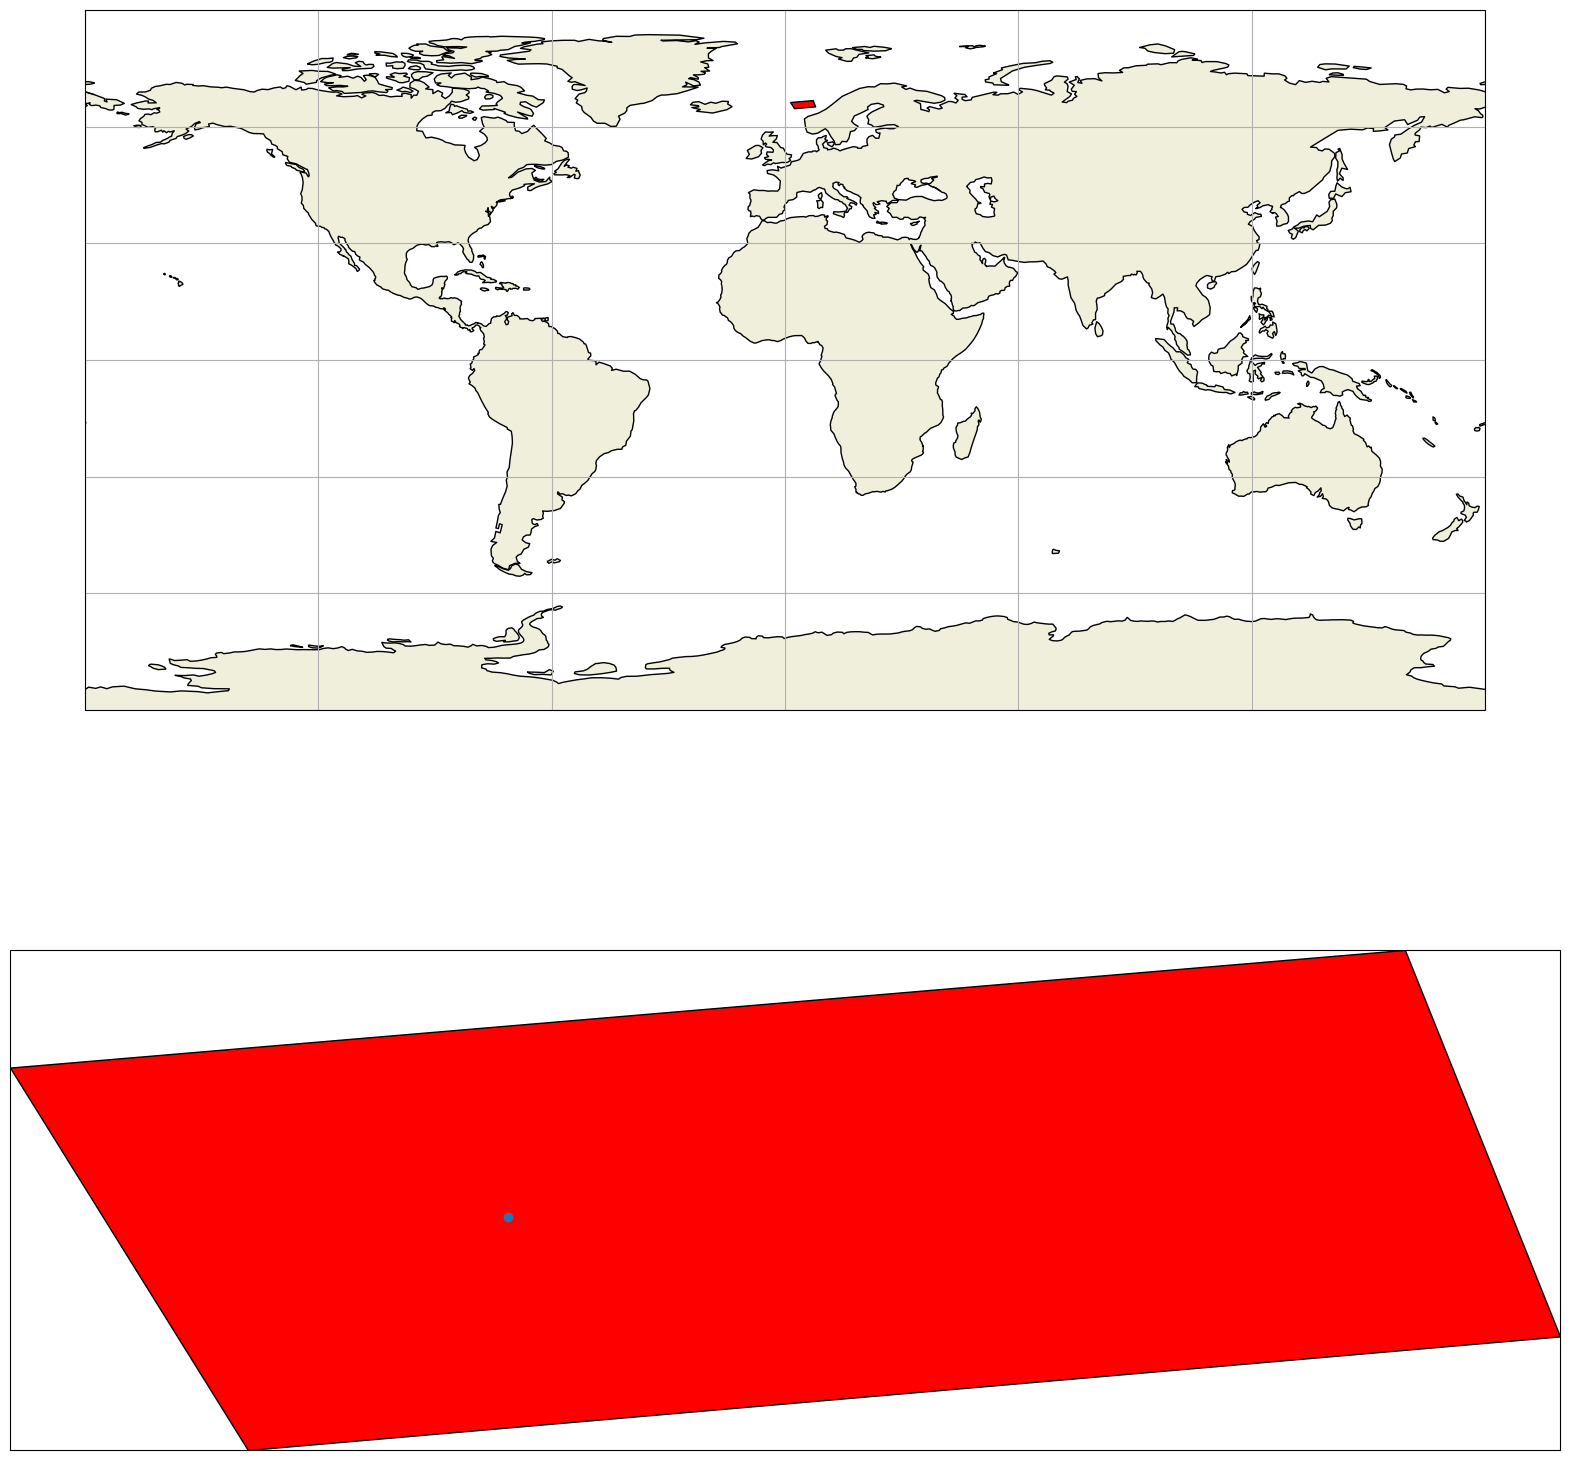

In [12]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

import numpy as np

fig = plt.figure(figsize=(20, 20))

bounds = products_gdf.total_bounds

ax1 = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax1.gridlines()
ax1.add_geometries(products_gdf.geometry, crs = ccrs.PlateCarree(), facecolor='red', edgecolor='k')
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.COASTLINE)

ax2 = plt.subplot(2, 1, 2, projection=ccrs.PlateCarree())
ax2.add_geometries(products_gdf.geometry, crs = ccrs.PlateCarree(), facecolor='red', edgecolor='k')
ax2.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]], ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.COASTLINE)

locations_np = np.array(locations)
locs_x, locs_y = locations_np.T
ax2.scatter(locs_x, locs_y, transform=ccrs.PlateCarree(), zorder=2)

plt.show()

# pytroll

In [2]:
# see http://pytroll.github.io/

!pip install --user satpy rioxarray rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.8 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 113.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 26.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 26.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
  Created wheel for satpy: filename=satpy-0.37.1-py2.py3-none-any.whl size=1308928 sha256=21b6993ee16ac37dea8383ffa54426f1e3eff2efef6b0c968ec4ea

In [3]:
from satpy.utils import check_satpy

check_satpy()

Readers
abi_l1b:  ok
abi_l1b_scmi:  ok
abi_l2_nc:  ok
acspo:  ok
agri_l1:  ok
ahi_hrit:  ok
ahi_hsd:  ok
ahi_l1b_gridded_bin:  ok
ami_l1b:  cannot find module 'satpy.readers.ami_l1b' (No module named 'pyspectral')
amsr2_l1b:  ok
amsr2_l2:  ok
amsr2_l2_gaasp:  ok
amsub_l1c_aapp:  ok
ascat_l2_soilmoisture_bufr:  ok
avhrr_l1b_aapp:  ok
avhrr_l1b_eps:  ok
avhrr_l1b_gaclac:  cannot find module 'satpy.readers.avhrr_l1b_gaclac' (No module named 'pygac')
avhrr_l1b_hrpt:  cannot find module 'satpy.readers.hrpt' (No module named 'geotiepoints')
avhrr_l1c_eum_gac_fdr_nc:  ok
caliop_l2_cloud:  cannot find module 'satpy.readers.caliop_l2_cloud' (No module named 'pyhdf')
clavrx:  cannot find module 'satpy.readers.clavrx' (No module named 'pyhdf')
cmsaf-claas2_l2_nc:  ok
electrol_hrit:  ok
fci_l1c_nc:  ok
fci_l2_nc:  ok
generic_image:  ok
geocat:  ok
ghrsst_l2:  ok
glm_l2:  ok
goes-imager_hrit:  ok
goes-imager_nc:  ok
gpm_imerg:  ok
grib:  ok
hsaf_grib:  ok
hy2_scat_l2b_h5:  ok
iasi_l2:  ok
iasi_l2_s

In [15]:
from satpy import Scene, find_files_and_readers
from datetime import datetime
import zipfile
from os import path
import glob

for product_name in products_gdf.title:
    zip_filename = data_dir + "{}.zip".format(product_name)
    safe_dir_name = data_dir + "{}.SAFE".format(product_name)

    if not path.exists(safe_dir_name):
        with zipfile.ZipFile(zip_filename,"r") as zip_ref:
            zip_ref.extractall(data_dir)

In [27]:
import os
print(os.listdir(data_dir + "S1A_IW_SLC__1SDV_20220925T171245_20220925T171312_045164_0565E1_37BD.SAFE"))

files = find_files_and_readers(
    base_dir=data_dir + "S1A_IW_SLC__1SDV_20220925T171245_20220925T171312_045164_0565E1_37BD.SAFE",
    reader="sar-c_safe")

['S1A_IW_SLC__1SDV_20220925T171245_20220925T171312_045164_0565E1_37BD.SAFE-report-20220925T180337.pdf', 'preview', 'support', 'manifest.safe', 'measurement', 'annotation']


ValueError: No supported files found

In [17]:
from satpy.dataset import DataQuery

scn = Scene(filenames=files)

scn.available_dataset_names()
scn.available_composite_names()

['sar-ice',
 'sar-ice-iw',
 'sar-ice-legacy',
 'sar-ice-log',
 'sar-ice-log-iw',
 'sar-land',
 'sar-land-iw',
 'sar-quick',
 'sar-rgb']

In [14]:
vh_id = DataQuery(name="measurement", polarization="vh")
scn.load([vh_id])
scn[vh_id]

ERROR 1: PROJ: proj_create_from_database: ellipsoid not found
ERROR 1: PROJ: proj_create_from_database: ellipsoid not found
ERROR 1: PROJ: proj_create_from_database: ellipsoid not found
ERROR 1: PROJ: proj_create_from_database: ellipsoid not found


<xarray.DataArray (y: 16678, x: 26733)>
dask.array<clip, shape=(16678, 26733), dtype=float64, chunksize=(4096, 4096), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) int64 0 1 2 3 4 5 6 ... 16672 16673 16674 16675 16676 16677
  * x            (x) int64 0 1 2 3 4 5 6 ... 26727 26728 26729 26730 26731 26732
    band         int64 1
    spatial_ref  int64 0
    crs          object +proj=latlong +datum=WGS84 +ellps=WGS84 +type=crs
Attributes:
    name:                 measurement
    sensor:               sar-c
    wavelength:           [5.4, 5.405, 5.41]
    resolution:           80
    polarization:         vh
    calibration:          gamma
    quantity:             natural
    coordinates:          ('longitude', 'latitude')
    file_type:            safe_measurement
    standard_name:        backscatter
    units:                1
    modifiers:            ()
    platform_name:        s1b
    start_time:           2021-12-15 06:10:27
    end_time:             2021-12-15 06:10:52
    reader:               sar-c_safe
    area:                 Shape: (16678, 26733)\nLons: <xarray.DataArray 'int...
    _satpy_id:            DataID(name='measurement', polarization='vh', resol...
    ancillary_variables:  []

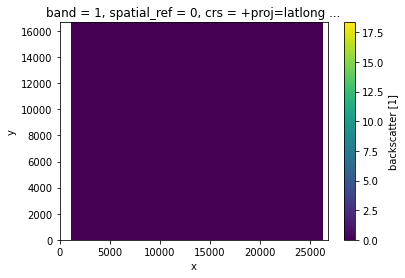

In [16]:
# To save as Geotiff (including the GCPs):
#scn.save_dataset(vh_id)

# XXX: Takes forever... investigate further
scn[vh_id].plot.imshow()

# XXX: Check out https://python-kurs.github.io/sommersemester_2019/units/S01E06.html 
# and https://nbviewer.org/github/pytroll/pytroll-examples/ ?